In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('mental_health_dataset.csv')

In [3]:
df.head()

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,Yes,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,Yes,3,5.4,0,24,12,70,69.0,High


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   gender                  10000 non-null  object 
 2   employment_status       10000 non-null  object 
 3   work_environment        10000 non-null  object 
 4   mental_health_history   10000 non-null  object 
 5   seeks_treatment         10000 non-null  object 
 6   stress_level            10000 non-null  int64  
 7   sleep_hours             10000 non-null  float64
 8   physical_activity_days  10000 non-null  int64  
 9   depression_score        10000 non-null  int64  
 10  anxiety_score           10000 non-null  int64  
 11  social_support_score    10000 non-null  int64  
 12  productivity_score      10000 non-null  float64
 13  mental_health_risk      10000 non-null  object 
dtypes: float64(2), int64(6), object(6)
memo

### El dataset a trabajar cuenta con:
- 14 columnas
- 10.000 observaciones
- Sin datos faltantes

In [5]:
### Columnas numéricos

df.describe()

,age,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.557600,5.572000,6.473000,3.505700,15.039900,10.56180,50.117700,77.312210
std,13.749581,2.887741,1.473944,2.282737,8.990839,6.32264,29.229278,14.061202
min,18.000000,1.000000,3.000000,0.000000,0.000000,0.00000,0.000000,42.800000
25%,30.000000,3.000000,5.500000,2.000000,7.000000,5.00000,25.000000,65.800000
50%,41.500000,6.000000,6.500000,4.000000,15.000000,11.00000,50.000000,77.600000
75%,53.000000,8.000000,7.500000,5.000000,23.000000,16.00000,76.000000,89.200000
max,65.000000,10.000000,10.000000,7.000000,30.000000,21.00000,100.000000,100.000000


### En las columnas numéricas podemos observar:
- *Edad:* Una mediana de 41 años, siendo la edad min de 18 y máx de 65.
- *Nivel de estres:* Valuado del 1 (bajo) al 10 (alto), se ubica en una mediana de 6 puntos.
- *Hs de sueño:* Mediana de casi 7hs.
  ## terminar de completar!!!

In [6]:
### Columnas categóricos
df[['employment_status', 'work_environment', 'mental_health_history', 'seeks_treatment', 'mental_health_risk', 'gender']].describe()

,employment_status,work_environment,mental_health_history,seeks_treatment,mental_health_risk,gender
count,10000,10000,10000,10000,10000,10000
unique,4,3,2,2,3,4
top,Employed,On-site,No,No,Medium,Male
freq,5868,5044,6969,6012,5892,4557


#### De acuerdo a las columnas categoricas, podemos determinar que la mayoria de las personas estudiadas
* Son empleados
* Trabajan en el lugar de trabajo
* No tienen antecedentes de salud mental
* No buscan tratamiento
* Y cuentan con un riesgo medio de padecer alguna enfermedad de salud mental

## DESARROLLO 

### Clasificación de los niveles de ansiedad declarados por los encuestados

#### Voy a enfocar mi analisis en determinar los niveles de ansiedad y depresión de los mismos. 
#### Para clasificar los niveles de ansiedad tomare como guia el test denominado "GAD-7 – Trastorno de Ansiedad Generalizada (Generalized Anxiety Disorder-7)" herramienta ampliamente utilizada por psicólogos, psiquiatras y médicos - que en base a las respuestas de los pacientes se establece la siguiente escala.


* Puntuacion de ansiedad del 0 al 21 basado en test GAD-7.

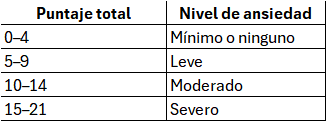

In [7]:
## De acuerdo a los rangos declarados en la tabla anterior realizamos la categorización de los mismos para determinar con palabras el nivel de ansiedad.

rangos = [0, 4, 9, 14, 21]  
categorias = ["Mínimo o ninguno", "Leve", "Moderado", "Severo"]

df['anxiety_level'] = pd.cut(df["anxiety_score"], bins=rangos, labels=categorias, include_lowest=True)



<Axes: xlabel='anxiety_level', ylabel='count'>

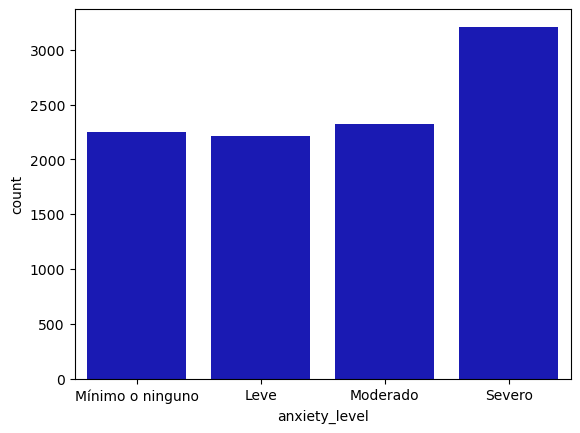

In [8]:
## Grafico
sns.countplot(x='anxiety_level', data=df, color='mediumblue')

#### Se puede determinar que del total de observaciones más de 3000 cuentan con ansiedad severa (de 15 a 21 puntos)

In [9]:
##Sacar el % por cada categoria de ansiedad.

df['anxiety_level'].value_counts(normalize=True) * 100



anxiety_level
Severo              32.06
Moderado            23.27
Mínimo o ninguno    22.50
Leve                22.17
Name: proportion, dtype: float64

#### Podemos observar que un 55,33% padece ansiedad de MODERADA a SEVERA.

### Clasificación de los niveles de depresion declarados por los encuestados

### De la misma manera que con la ansiedad me guiare para analizar los niveles de ansiedad por el test PHQ-9 – Cuestionario de Salud del Paciente (Patient Health Questionnaire-9). De cual se desprende la siguiente escala.

* Puntuacion de ansiedad del 0 al 27 basado en test PHQ-9.
  Puntaje total	Nivel de depresión

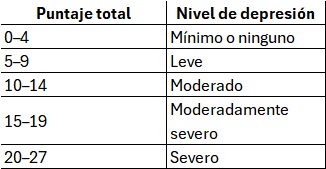



In [38]:
rangosD = [0,4,9,14,19,30]
categoriasD = ['Mínimo o ninguno','Leve','Moderado','Moderadamente severo','Severo']

df['depression_level'] = pd.cut(df["depression_score"], bins=rangosD, labels=categoriasD, include_lowest=True)


<Axes: xlabel='depression_level', ylabel='count'>

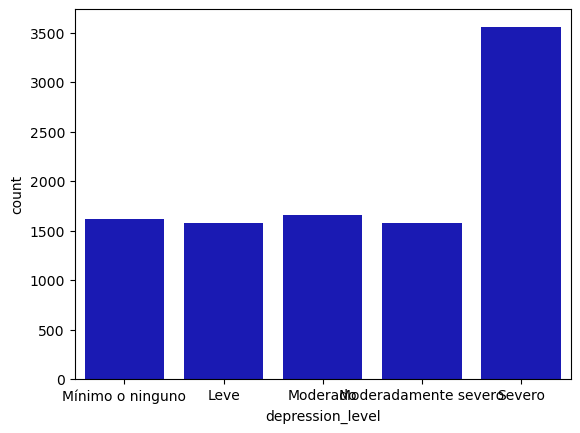

In [39]:
sns.countplot(x='depression_level', data=df, color='mediumblue')

In [40]:
##Sacar el % por cada categoria de depresion.

df['depression_level'].value_counts(normalize=True) * 100

depression_level
Severo                  35.58
Moderado                16.61
Mínimo o ninguno        16.22
Moderadamente severo    15.81
Leve                    15.78
Name: proportion, dtype: float64

### Podemos observar que un 64,37% padece depresion entre MODERADA y SEVERA.

#### Debido a estos altos niveles de ansiedad y depresion se van a evaluar las diferentes columnas contenedoras de datos de las personas encuestadas para determinar si tienen o no incidencia con dichos padecimientos.

* Edad
* Genero
* Situacion laboral
* Entorno laboral
* Antecedentes de salud mental
* Nivel de estres
* Horas de sueño
* Dias de actividad física
* Riesgo de salud mental

### Edad.

#### Como se observo anteriormente, la edad va desde los 18(min) a los 65(max), por lo tanto lo voy a seccionar en 5 para su evaluacion.

* 18 a 25
* 25 a 35
* 35 a 45
* 45 a 55
* 55 a 65

In [41]:
rangosAge = [0, 25, 35, 45, 55, 65]  
categoriasAge = ["18-24 años", "25-34 años", "35-44 años", "45-54 años", "55-65 años"]

df['age_range'] = pd.cut(df['age'], bins=rangosAge, labels=categoriasAge, include_lowest=True)

In [42]:
df['age_range'].value_counts()

age_range
35-44 años    2147
25-34 años    2093
45-54 años    2074
55-65 años    2064
18-24 años    1622
Name: count, dtype: int64

#### RELACIÓN ANSIEDAD - EDAD

<Axes: xlabel='age_range', ylabel='anxiety_score'>

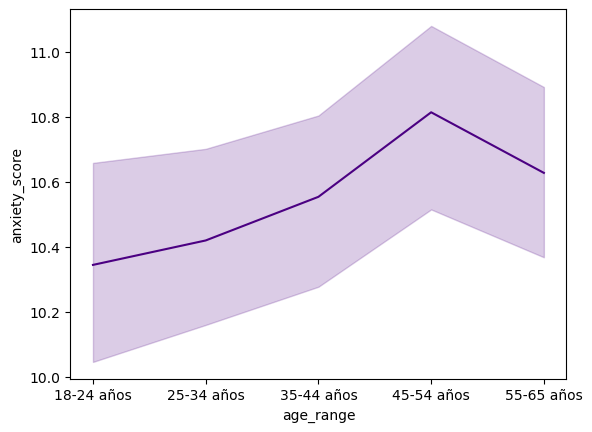

In [43]:
sns.lineplot(x='age_range', y='anxiety_score', data=df, color='indigo')

#### Del grafico se puede exponer que:
* La puntuación promedio de cada rango etareo esta entre los 10 y 11 puntos, lo que indica un ansiedad promedio MODERADA.
* De los 18 a los 44 años se registra un aumento continuado
* Alcanzando el punto más alto en el rango de los 45 a 54 años

#### RELACION DEPRESIÓN - EDAD

<Axes: xlabel='age_range', ylabel='depression_score'>

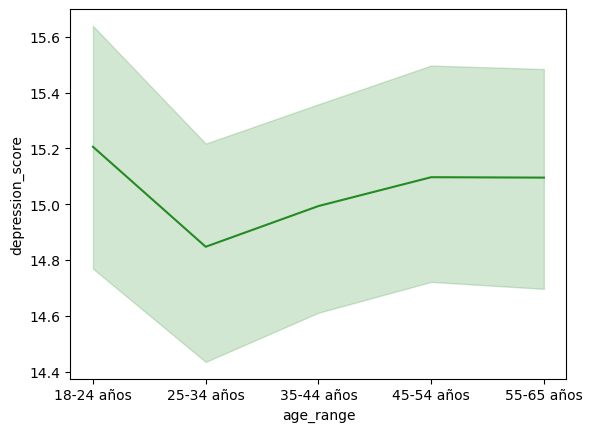

In [44]:
sns.lineplot(x='age_range', y='depression_score', data=df, color='forestgreen')

#### Del grafico se puede exponer que:
* La media se establece entre los 14,8 y 15,2 en todas las edades lo que indica en promedio una depresión MODERADAMENTE SEVERA.
* El pico más alto se observa entre los 18 y 24 años
* Descendiendo hasta su pico más bajo en el rango de 25 a 34 años


### Género.

In [45]:
totales = df['gender'].value_counts()

#### RELACIÓN ANSIEDAD - GENERO

In [46]:
## Determinar por genero cuantas sufren de ansiedad severa o moderada

filtro1 = df[df['anxiety_score'] > 9]
filtro1

ansiedad = filtro1['gender'].value_counts()

In [47]:
##Cuánto del total por género sufre ansiedad severa o moderada

porcentaje = (ansiedad / totales * 100).round(2)
porcentaje

gender
Male                 55.45
Female               54.70
Non-binary           58.08
Prefer not to say    57.08
Name: count, dtype: float64

<Axes: xlabel='gender'>

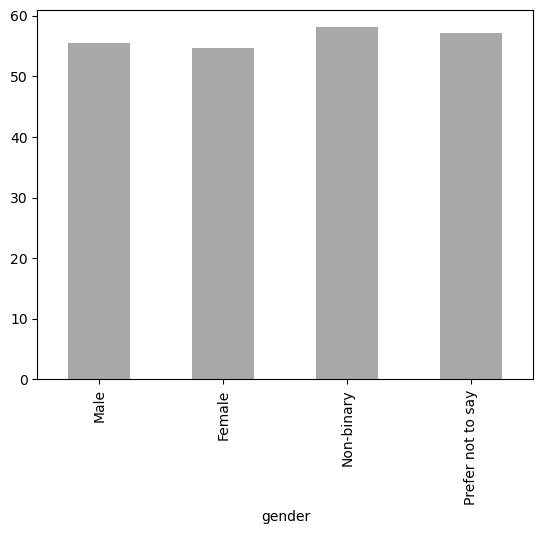

In [48]:
import matplotlib.pyplot as plt

porcentaje.plot(kind='bar', color='darkgray')

<Axes: xlabel='gender', ylabel='anxiety_score'>

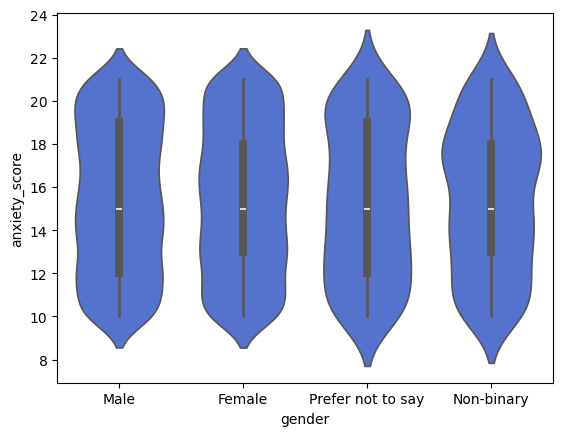

In [49]:
sns.violinplot(x='gender', y='anxiety_score', data=filtro1, color = 'royalblue')

##### A partir del análisis se observa que más del 50% de las personas en cada género presentan niveles de ansiedad severa o moderada. Los porcentajes son muy similares entre los distintos grupos (oscilan entre ~54% y ~58%), lo que sugiere que el género no es un factor determinante en la prevalencia de la ansiedad dentro de esta muestra.

#### RELACIÓN DEPRESION - GENERO

In [50]:
## Determinar por genero cuantas sufren de depresion severa o moderada

filtro2 = df[df['depression_score'] > 10]
filtro2

depresion = filtro2['gender'].value_counts()

In [51]:
##Cuánto del total por género sufre depresion severa o moderada

porcentaje2 = (depresion / totales *100).round(2)
porcentaje2

gender
Male                 65.20
Female               65.09
Non-binary           61.15
Prefer not to say    62.02
Name: count, dtype: float64

<Axes: xlabel='gender'>

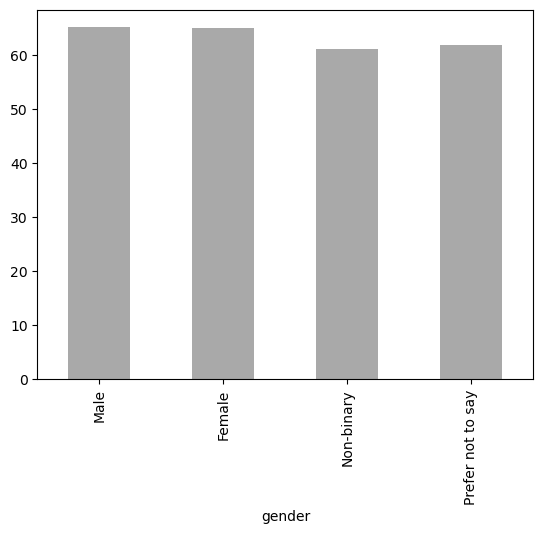

In [52]:
porcentaje2.plot(kind='bar', color='darkgray')

<Axes: xlabel='gender', ylabel='depression_score'>

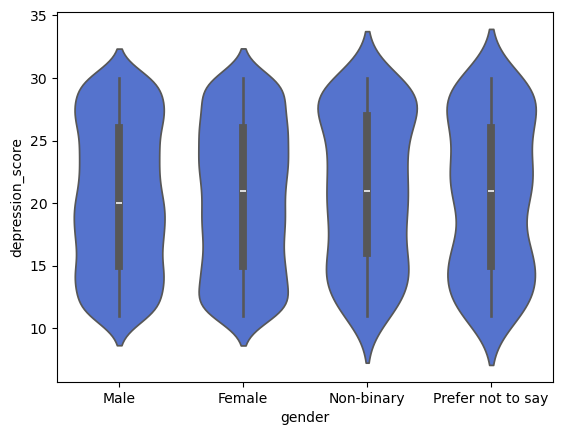

In [53]:
sns.violinplot(x='gender', y='depression_score', data=filtro2, color = 'royalblue')

##### A partir del análisis se observa que más del 60% de las personas en cada género presentan niveles de depresión severa o moderada. Los porcentajes son muy similares entre los distintos grupos (oscilan entre ~61% y ~66%), lo que sugiere que el género no es un factor determinante en la prevalencia de la depresión dentro de esta muestra.

### Situación laboral.

In [54]:
df['employment_status'].value_counts()

employment_status
Employed         5868
Student          2043
Self-employed    1045
Unemployed       1044
Name: count, dtype: int64

#### RELACIÓN DEPRESION Y ANSIEDAD - CATEGORIA: EMPLEADO

In [55]:
filtro3 = df[df['employment_status'] == 'Employed']

# PORCENTAJE DE NIVELES DE ANSIEDAD SOBRE "EMPLEADO"

(filtro3['anxiety_level'].value_counts(normalize = True)*100).round(2)

anxiety_level
Severo              31.56
Moderado            23.19
Leve                22.67
Mínimo o ninguno    22.58
Name: proportion, dtype: float64

In [56]:
# PORCENTAJE DE NIVELES DE DEPRESION SOBRE "EMPLEADO"

(filtro3['depression_level'].value_counts(normalize = True)*100).round(2)

depression_level
Severo                  35.55
Moderadamente severo    16.46
Moderado                16.21
Mínimo o ninguno        16.19
Leve                    15.59
Name: proportion, dtype: float64

#### RELACIÓN DEPRESION Y ANSIEDAD - CATEGORIA: AUTONOMO

In [57]:
filtro4 = df[df['employment_status'] == 'Self-employed']

# PORCENTAJE DE NIVELES DE ANSIEDAD SOBRE "AUTONOMO"

(filtro4['anxiety_level'].value_counts(normalize = True)*100).round(2)

anxiety_level
Severo              32.92
Leve                23.25
Mínimo o ninguno    22.39
Moderado            21.44
Name: proportion, dtype: float64

In [58]:
# PORCENTAJE DE NIVELES DE DEPRESION SOBRE "AUTONOMO"

(filtro4['depression_level'].value_counts(normalize = True)*100).round(2)

depression_level
Severo                  35.31
Mínimo o ninguno        17.99
Leve                    16.17
Moderado                15.69
Moderadamente severo    14.83
Name: proportion, dtype: float64

In [59]:
filtro5 = df[df['employment_status'] == 'Student']

# PORCENTAJE DE NIVELES DE ANSIEDAD SOBRE "ESTUDIANTE"

(filtro5['anxiety_level'].value_counts(normalize = True)*100).round(2)

anxiety_level
Severo              32.89
Moderado            24.03
Mínimo o ninguno    22.56
Leve                20.51
Name: proportion, dtype: float64

In [60]:
# PORCENTAJE DE NIVELES DE DEPRESION SOBRE "ESTUDIANTE"

(filtro5['depression_level'].value_counts(normalize = True)*100).round(2)

depression_level
Severo                  36.66
Moderado                17.52
Leve                    15.57
Mínimo o ninguno        15.42
Moderadamente severo    14.83
Name: proportion, dtype: float64

In [61]:
filtro6 = df[df['employment_status'] == 'Unemployed']

# PORCENTAJE DE NIVELES DE ANSIEDAD SOBRE "DESEMPLEADO"

(filtro6['anxiety_level'].value_counts(normalize = True)*100).round(2)

anxiety_level
Severo              32.38
Moderado            24.04
Mínimo o ninguno    22.03
Leve                21.55
Name: proportion, dtype: float64

In [62]:
# PORCENTAJE DE NIVELES DE DEPRESION SOBRE "DESEMPLEADO"

(filtro6['depression_level'].value_counts(normalize = True)*100).round(2)

depression_level
Severo                  33.91
Moderado                18.01
Leve                    16.86
Mínimo o ninguno        16.19
Moderadamente severo    15.04
Name: proportion, dtype: float64

### Antecedentes de salud mental.

<Axes: xlabel='mental_health_history'>

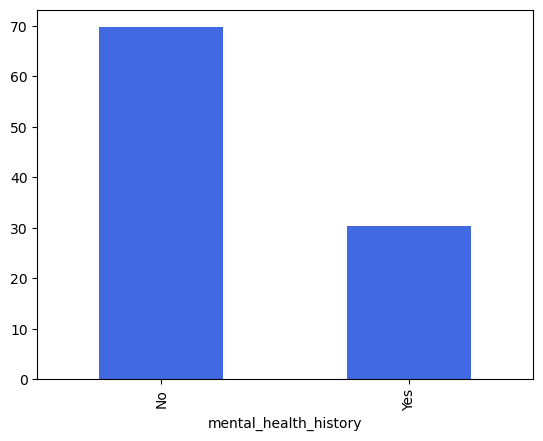

In [63]:
(df['mental_health_history'].value_counts(normalize = True)*100).plot(kind= 'bar', color = 'royalblue')

#### El 70% de la muestra NO tiene antecedentes en salud mental

In [36]:
## hacer filtro que agrupe todos los que SI tengan depresion o ansiedad, excluyendo sólo "mínimo o ninguno"

In [98]:
filtro7 = df[df['anxiety_score'] > 4]
anxydep = filtro7['anxiety_level'].count()

In [80]:
total_anx_dep = df['anxiety_level'].count()

In [99]:
porcentaje3 = (anxydep / total_anx_dep * 100).round(2)
porcentaje3

np.float64(77.5)

#### El 75.5% de la muestra sufre de depresión y ansiedad

In [105]:
filtro8 = filtro7[filtro7['mental_health_history'] == 'No']
history = filtro8['mental_health_history'].count()
history

np.int64(5410)

In [109]:
porcentaje4 = (history / anxydep * 100).round(2)
porcentaje4

np.float64(69.81)

#### El 69.81% de los que SI padecen de depresión y ansiedad NO tienen antecedentes de salud mental. 
### Por lo tanto se infiere en que la genética no es un factor determinante de estos dos padecimientos.